# The Power of Plots
1. There is a pattern of greater numbers of rides and drivers with lower fares per ride as population density increases from rural to urban city types
2. There is signficant variance from this trend for rural city types where average fare per ride is much more widely distributed than in suburban or urban city types.
3. Port James is a signficant outlier within the subrban city type where both rides and average fare per ride is signficantly higher than other suburban cities, and these greater revenues are distributed among a relatively smaller number of drivers compared to any city type

In [6]:
# Load libraries
import pandas as pd
import numpy as py
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import requests

# Initialize variables
fileInputRide='ride_data.csv'
fileInputCity='city_data.csv'

# Open input file, read into frame
pdRideData = pd.read_csv(fileInputRide)
pdCityData = pd.read_csv(fileInputCity)

In [3]:
pdRideData.head(5)

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


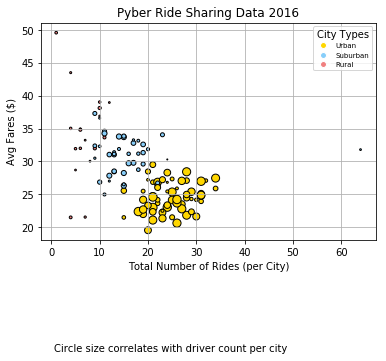

In [4]:
# Bubble Plot of Ride Sharing Data
pdCityData['Color']=""

for index, row in pdCityData.iterrows():
    if row['type'] == 'Urban':
       pdCityData.at[index,'Color'] = 'gold'
    elif row['type'] == 'Suburban':
       pdCityData.at[index,'Color'] = 'lightskyblue'
    elif row['type'] == 'Rural':
        pdCityData.at[index,'Color'] = 'lightcoral'
        
pdJoinedCityRiderData=pdRideData.join(pdCityData.set_index('city'), on='city', how='left', lsuffix='_Ride', rsuffix='_City', sort=False)
pdJoinedCityRiderGroupedByCity=pdJoinedCityRiderData.groupby(['city','type', 'Color'], as_index=False).agg({'ride_id': 'count','fare': 'mean', 'driver_count': 'min'})
pdJoinedCityRiderGroupedByCity.columns=['City','Type','Color','Ride Count','Avg Fare', 'Driver Count']

plt.xlabel('Total Number of Rides (per City)')
plt.ylabel('Avg Fares ($)')
plt.title('Pyber Ride Sharing Data 2016')
plt.scatter(pdJoinedCityRiderGroupedByCity['Ride Count'], pdJoinedCityRiderGroupedByCity['Avg Fare'], label=pdJoinedCityRiderGroupedByCity['Type'], color=pdJoinedCityRiderGroupedByCity['Color'], s=pdJoinedCityRiderGroupedByCity['Driver Count'], edgecolor='black')
plt.grid(True)
urban_patch = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="gold", label='Urban')
suburban_patch = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="lightskyblue", label='Suburban')
rural_patch = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="lightcoral", label='Rural')
plt.legend(handles=[urban_patch, suburban_patch, rural_patch], fontsize=7, title='City Types')
plt.text(.5, 1, "Circle size correlates with driver count per city")
plt.show()

In [7]:
pdJoinedCityRiderGroupedByCity.to_csv('example.csv')

,City,Type,Color,Ride Count,Avg Fare,Driver Count
0,Alvarezhaven,Urban,gold,31,23.928710,21
1,Alyssaberg,Urban,gold,26,20.609615,67
2,Anitamouth,Suburban,lightskyblue,9,37.315556,16
3,Antoniomouth,Urban,gold,22,23.625000,21
4,Aprilchester,Urban,gold,19,21.981579,49
5,Arnoldview,Urban,gold,31,25.106452,41
6,Campbellport,Suburban,lightskyblue,15,33.711333,26
7,Carrollbury,Suburban,lightskyblue,10,36.606000,4
8,Carrollfort,Urban,gold,29,25.395517,55
9,Clarkstad,Suburban,lightskyblue,12,31.051667,21


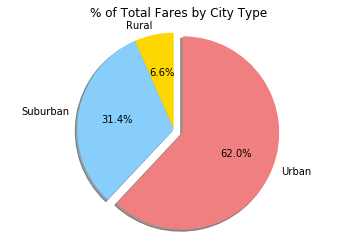

In [3]:
# Total fares by city type
pdJoinedGroupedByType=pdJoinedCityRiderData.groupby(['type'], as_index=True).agg({'fare': 'sum'})
TotalFares=pdJoinedGroupedByType['fare'].sum()
pdJoinedGroupedByType['Percentage']=pdJoinedGroupedByType['fare']/TotalFares*100
pdJoinedGroupedByType.sort_values('Percentage', ascending=False)

labels = 'Rural', 'Suburban', 'Urban'
sizes = pdJoinedGroupedByType['Percentage']
explode = (0, 0, 0.1)
fig1, ax1 = plt.subplots()
colors = ['gold', 'lightskyblue', 'lightcoral']
ax1.pie(sizes, colors=colors, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.title('% of Total Fares by City Type')
plt.show()

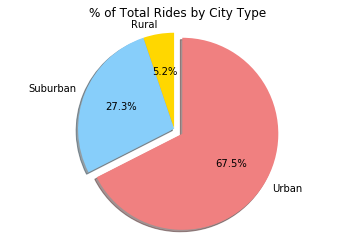

In [4]:
# Total rides by city type
pdJoinedGroupedByType=pdJoinedCityRiderData.groupby(['type'], as_index=True).agg({'fare': 'count'})
TotalRides=pdJoinedGroupedByType['fare'].sum()
pdJoinedGroupedByType['Percentage']=pdJoinedGroupedByType['fare']/TotalRides*100
pdJoinedGroupedByType.sort_values('Percentage', ascending=False)

labels = 'Rural', 'Suburban', 'Urban'
sizes = pdJoinedGroupedByType['Percentage']
explode = (0, 0, 0.1)
fig1, ax1 = plt.subplots()
colors = ['gold', 'lightskyblue', 'lightcoral']
ax1.pie(sizes, colors=colors, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.title('% of Total Rides by City Type')
plt.show()

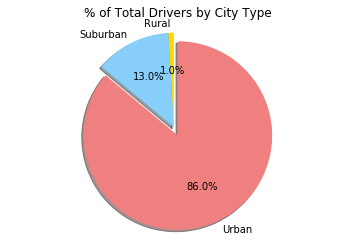

In [5]:
# Total drivers by city type
pdJoinedGroupedByType=pdJoinedCityRiderData.groupby(['type'], as_index=True).agg({'driver_count': 'sum'})
TotalDrivers=pdJoinedGroupedByType['driver_count'].sum()
pdJoinedGroupedByType['Percentage']=pdJoinedGroupedByType['driver_count']/TotalDrivers*100
pdJoinedGroupedByType.sort_values('Percentage', ascending=False)

labels = 'Rural', 'Suburban', 'Urban'
sizes = pdJoinedGroupedByType['Percentage']
explode = (0, 0, 0.1)
fig1, ax1 = plt.subplots()
colors = ['gold', 'lightskyblue', 'lightcoral']
ax1.pie(sizes, colors=colors, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.title('% of Total Drivers by City Type')
plt.show()

In [8]:
pdJoinedCityRiderGroupedByCity.sort_values("Ride Count", ascending=False).head(5)

,City,Type,Color,Ride Count,Avg Fare,Driver Count
72,Port James,Suburban,lightskyblue,64,31.806562,3
73,Port Johnstad,Urban,gold,34,25.882941,22
100,Swansonbury,Urban,gold,34,27.464706,64
94,South Louis,Urban,gold,32,27.087500,12
0,Alvarezhaven,Urban,gold,31,23.928710,21
